# Customer Segmentation with K-Means Clustering

## 1. Introduction

**Customer segmentation** is a critical strategy in retail that involves dividing a broad customer base into smaller, more manageable groups based on shared characteristics. These characteristics can include demographics, purchasing behavior, preferences, and spending habits. The importance of customer segmentation in retail lies in its ability to provide targeted insights that can enhance marketing efforts and overall business performance.

#### Importance of Customer Segmentation:

1. **Targeted Marketing**: By understanding the unique needs and behaviors of different customer segments, retailers can create tailored marketing campaigns that resonate with each group. This leads to higher engagement rates and improved conversion rates, as customers are more likely to respond to offers that align with their interests.

2. **Personalized Customer Experience**: Segmentation allows businesses to customize the shopping experience for different groups. For instance, a retailer might offer exclusive discounts or product recommendations based on a customer's spending habits or preferences. This personalization fosters customer loyalty and satisfaction.

3. **Resource Optimization**: Effective segmentation helps retailers allocate resources more efficiently. By identifying high-value segments, businesses can focus their marketing budgets and efforts on the customers most likely to drive sales, ultimately improving return on investment (ROI).

4. **Enhanced Product Development**: Understanding customer segments can also inform product development and inventory decisions. Retailers can tailor their offerings to meet the specific needs of different groups, ensuring that they provide products that resonate with their target audience.

5. **Competitive Advantage**: In a crowded market, the ability to segment customers effectively can differentiate a retailer from competitors. By delivering targeted messaging and tailored experiences, businesses can build a strong brand reputation and customer loyalty.

6. **Data-Driven Decisions**: Customer segmentation relies on data analysis, enabling retailers to make informed decisions based on empirical evidence rather than intuition. This data-driven approach reduces risks and increases the likelihood of successful marketing strategies.

In summary, customer segmentation is vital for retailers aiming to improve their marketing strategies and enhance customer satisfaction. By understanding and addressing the distinct needs of different customer groups, businesses can drive sales, foster loyalty, and maintain a competitive edge in the market.

### Dataset
This file contains the basic information (ID, age, gender, income, spending score) about the customers.

## 2. Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## 3. Data Collection and Analysis

In [4]:
customer_data=pd.read_csv('Mall_Customers.csv').drop_duplicates(keep='first')
customer_data.shape

(200, 5)

In [5]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


In [7]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Based on the data, it is clear that annual income and spending score will help in segmentation of customers.

#### Renaming the above columns for our convenience.

In [8]:
customer_data.rename(columns={'Annual Income (k$)':'annual_income',
                             'Spending Score (1-100)':'spending_score'},
                    inplace=True)

In [9]:
customer_data.head()

,CustomerID,Gender,Age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
## Choosing our independent variable
X=customer_data[['annual_income','spending_score']]

In [11]:
## Normalizing the data
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

## 4. Selecting optimal number of clusters

#### Calculating the WCSS(Within Cluster Sum of Squares)

In [12]:
wcss=[]

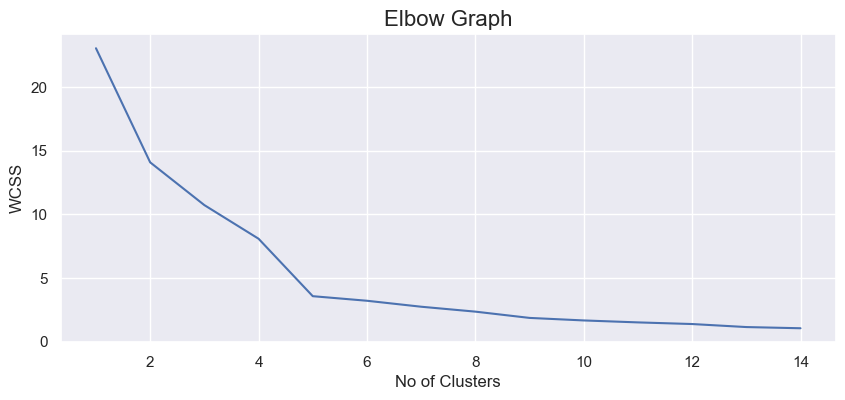

In [13]:
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,n_init='auto',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
## Plotting elbow graph
sns.set()
plt.figure(figsize=(10,4))
plt.plot(range(1,15),wcss)
plt.title('Elbow Graph',size=16)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

#### Since there is sharp bend at 5, the optimum number of clusters is 5.

## 5. Training K-Means Clustering Model

In [14]:
## Initialize the K-Means algorithm with 5 clusters
kmeans=KMeans(n_clusters=5,n_init='auto',random_state=42)

## Fitting the K-Means algorithm to the X data and predicting the cluster for each datapoint
Y=kmeans.fit_predict(X)

## Add a new column 'cluster' to the original dataset X, storing the cluster label for each data point
X['cluster']=Y

## 6. Visualizing the Clusters

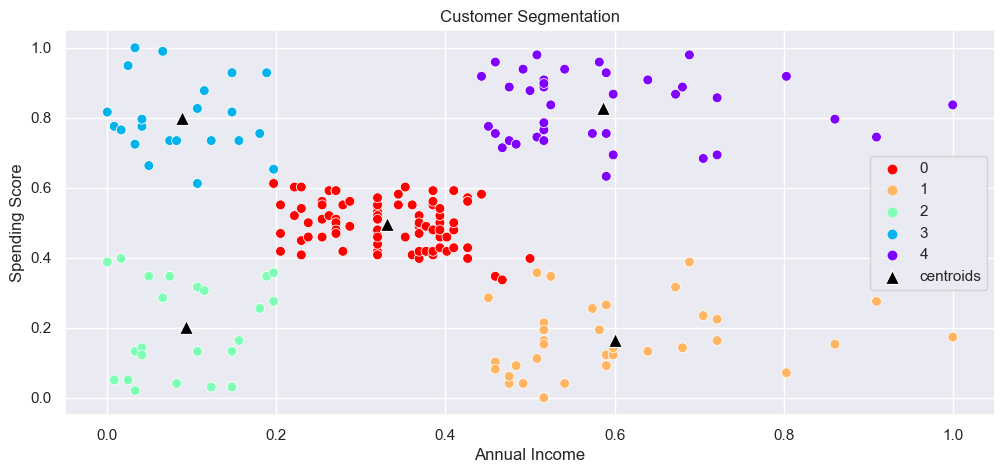

In [15]:
## Plotting all clusters with seaborn
plt.figure(figsize=(12,5))
sns.scatterplot(data=X,x='annual_income',y='spending_score',hue='cluster',palette='rainbow_r',s=50)

## Plot the centroids
centroids=pd.DataFrame(kmeans.cluster_centers_,columns=['annual_income','spending_score'])
sns.scatterplot(data=centroids,x='annual_income',y='spending_score',color='black',s=100,label='centroids',marker='^')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation')
plt.show()

## 7. Conclusion

#### Analyzing Clusters

In [ ]:
X.groupby(by='cluster').mean().reset_index().style.background_gradient(cmap='Greens')

**CONCLUSIONS**

**Cluster 0** - Customers in Cluster 0 have low annual incomes but maintain average spending. They manage their finances carefully, balancing essential and discretionary purchases.¶<br>
**Cluster 1** - Cluster 1 includes customers with high incomes but low spending. They prefer saving or investing over spending, indicating a conservative financial approach.<br>
**Cluster 2** - Customers in Cluster 2 have very low incomes and low spending, focusing on essential needs with minimal expenditures due to limited financial resources.<br>
**Cluster 3** - Cluster 3 features customers with very low incomes but high spending. Despite limited means, they prioritize spending on non-essential or luxury items.<br>
**Cluster 4** - Cluster 4 consists of affluent customers with high spending. They are key targets for luxury goods or premium services, reflecting both financial capability and a strong willingness to spend.¶